,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


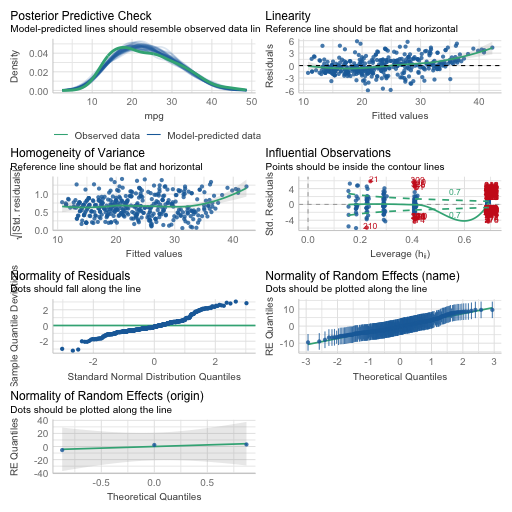

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
model_year,1661.217338,1661.217338,1,383.859501,190.245076,1.969044e-35


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rpy2.robjects as ro
from rpy2.robjects.lib import grdevices
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from IPython.display import Image, display
from statannotations.Annotator import Annotator

def display_r_plot(plot):
    with grdevices.render_to_bytesio(grdevices.png, width=512, height=512, res=72) as img:
        ro.r.print(plot)

    img.seek(0)
    image = Image(data=img.read(), format='png')
    display(image)
    return image

pandas2ri.activate()

importr('emmeans')
importr('lmerTest')
importr('dplyr')
importr('performance')
importr('effectsize')

df = sns.load_dataset('mpg')
display(df.head())

ro.globalenv['df'] = df
ro.r('df$origin <- as.factor(df$origin)')
ro.r('df$name <- as.factor(df$name)')

ro.r(f'model <- lmer(mpg ~ model_year + (1|name) + (1|origin), data=df)')
display_r_plot(ro.r('check_model(model)'))
pandas2ri.rpy2py(ro.r('anova(model) %>% as.data.frame()'))